코로나 - 신종감염병 (2020년 자료에서만 뽑을 것)
메르스 - 중동호흡기증후군
신종플루 - 신종인플루엔자
지바바이러스 - 지카바이러스감염증(2020년 자료에는 없음)

## 대통령과 외래객 입국 자료(2010.01 - 2020.05)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 2010년 1월부터 2019년 8월까지 총 116개 엑셀파일 통합하기(전처리 과정 포함)
# create_kto_data 함수 생성
def kto_data(yy, mm):
    # 불러올 엑셀 파일 경로 지정
    file_path = '1005_data/kto_{}{}.xlsx'.format(yy, mm)
    
    # 엑셀 파일 불러오기
    # 1번 컬럼을 header로 보냄
    # 가장 아래쪽 4개의 통계를 skip함
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = 'A:G')
    
    # '년월' 컬럼 추가
    df['년월'] = '{}-{}'.format(yy, mm)
    
    # '국적' 컬럼에서 대륙 데이터 제거
    del_list = ['아시아주', '구주', '구주 기타', '대양주 기타', '아프리카주', '미주', '대양주', '교포소계']
    condition = (df['국적'].isin(del_list) == False) #대륙정보 미포함 조건
    df_country = df[condition].reset_index(drop = True) #대륙정보 제거
    
    # 대륙별로 볼 것이기 때문에 '대륙' 컬럼을 따로 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*22 + ['오세아니아']*2 + ['아프리카']*3 + ['기타대륙']*1 + ['교포']*1
    df_country['대륙'] = continents
    
    # 대통령 컬럼 추가
    if (2008 <= int(yy) and int(yy) < 2013 ) :
        df_country['대통령'] = "이명박"
    elif (2013 <= int(yy) and int(yy) < 2017 ) :
        df_country['대통령'] = "박근혜 "
    else :
        df_country['대통령'] = "문재인 "
    
    # 6. 결과 출력
    return(df_country)

In [3]:
# 담아줄 빈 프레임생성
kto_data_df = pd.DataFrame()

# 2010년부터 2021년까지 이중 for문
for yy in range(2010, 2021):
    for mm in range(1, 13):
        try:
            # zfill : 2자리 수로 맞추기
            # 1의 경우 01로 맞춰주는 것
            temp = kto_data(str(yy), str(mm).zfill(2))
            
            kto_data_df = pd.concat([kto_data_df, temp], ignore_index=True)
        except:
            # 2020년은 5월까지만 있으니까 아마도 여기서 Pass
            pass

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime

# year 컬럼 추가
kto_data_df['year'] = kto_data_df['년월'].str.slice(0,4)
kto_data_df[:10]

,국적,관광,상용,공용,유학/연수,기타,계,년월,대륙,대통령,year
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,이명박,2010
1,대만,35788,41,17,37,516,36399,2010-01,아시아,이명박,2010
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,이명박,2010
3,마카오,554,0,0,0,0,554,2010-01,아시아,이명박,2010
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,이명박,2010
5,말레이시아,3292,61,0,49,1157,4559,2010-01,아시아,이명박,2010
6,필리핀,3984,219,104,87,16820,21214,2010-01,아시아,이명박,2010
7,인도네시아,1840,327,3,65,2826,5061,2010-01,아시아,이명박,2010
8,싱가포르,4201,120,3,27,1017,5368,2010-01,아시아,이명박,2010
9,미얀마,630,18,54,10,3882,4594,2010-01,아시아,이명박,2010


In [5]:
# 데이터 정리
# 필요 데이터
# 국적, 계, 년월, 대륙, 대통령, year
kto_data_df_trim = kto_data_df.iloc[ :,[0, 6, 7, 8, 9, 10]]
kto_data_df_trim

,국적,계,년월,대륙,대통령,year
0,일본,209184,2010-01,아시아,이명박,2010
1,대만,36399,2010-01,아시아,이명박,2010
2,홍콩,14545,2010-01,아시아,이명박,2010
3,마카오,554,2010-01,아시아,이명박,2010
4,태국,17814,2010-01,아시아,이명박,2010
...,...,...,...,...,...,...
7370,남아프리카공화국,29,2020-05,아프리카,문재인,2020
7371,아프리카 기타,131,2020-05,아프리카,문재인,2020
7372,기타대륙,4,2020-05,아프리카,문재인,2020
7373,국적미상,4,2020-05,기타대륙,문재인,2020


## 법정 감염병 발생현황 월별

In [9]:
!pip install openpyxl


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
disease_data_1 = pd.read_excel('disease_data_1.xlsx', engine='openpyxl')
disease_data_2 = pd.read_excel('disease_data_2.xlsx', engine='openpyxl')
disease_data_1 = disease_data_1.T
disease_data_2 = disease_data_2.T

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
disease_data_1 = disease_data_1.rename(columns = disease_data_1.iloc[1])
disease_data_1 = disease_data_1.drop(disease_data_1.index[0])
disease_data_1 = disease_data_1.drop(disease_data_1.index[0])
disease_data_1

disease_data_2 = disease_data_2.rename(columns = disease_data_2.iloc[1])
disease_data_2 = disease_data_2.drop(disease_data_2.index[0])
disease_data_2 = disease_data_2.drop(disease_data_2.index[0])
disease_data_2

,급별(2),소계,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,...,황열,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열,중증열성혈소판감소증후군,지카바이러스 감염증
2020,계,60727,0,0,0,0,0,0,0,0,...,0,43,69,0,18,0,1,1,243,1
2020.1,1월,11,0,0,0,0,0,0,0,0,...,0,23,6,0,4,0,0,0,0,0
2020.2,2월,2920,0,0,0,0,0,0,0,0,...,0,14,3,0,1,0,0,0,0,1
2020.3,3월,6855,0,0,0,0,0,0,0,0,...,0,4,4,0,0,0,0,0,0,0
2020.4,4월,980,0,0,0,0,0,0,0,0,...,0,1,8,0,2,0,0,0,1,0
2020.5,5월,703,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,1,0,18,0
2020.6,6월,1331,0,0,0,0,0,0,0,0,...,0,0,15,0,4,0,0,0,38,0
2020.7,7월,1506,0,0,0,0,0,0,0,0,...,0,0,10,0,0,0,0,0,40,0
2020.8,8월,5641,0,0,0,0,0,0,0,0,...,0,0,6,0,1,0,0,0,51,0
2020.9,9월,3865,0,0,0,0,0,0,0,0,...,0,0,3,0,4,0,0,1,30,0


In [8]:
# 필요한 값들만 뽑아내기
disease_data_1 = disease_data_1[["지카바이러스감염증", "중동호흡기증후군", "신종인플루엔자"]]
disease_data_2 = disease_data_2[["중동호흡기증후군", "신종인플루엔자", "신종감염병증후군"]]

# 두 데이터 합하기
disease_data = pd.concat([disease_data_1, disease_data_2])

# 결측치는 모두 0으로 대체
disease_data = disease_data.fillna(0)
disease_data

,지카바이러스감염증,중동호흡기증후군,신종인플루엔자,신종감염병증후군
2009,-,-,-,0
2009.1,-,-,-,0
2009.2,-,-,-,0
2009.3,-,-,-,0
2009.4,-,-,-,0
...,...,...,...,...
2021.8,0,0,0,53077
2021.9,0,0,0,59858
2021.10,0,0,0,53415
2021.11,0,0,0,82517


In [9]:
# index에 있는 년월 컬럼으로 추가하기
disease_data['년월'] = disease_data.index
disease_data

,지카바이러스감염증,중동호흡기증후군,신종인플루엔자,신종감염병증후군,년월
2009,-,-,-,0,2009
2009.1,-,-,-,0,2009.1
2009.2,-,-,-,0,2009.2
2009.3,-,-,-,0,2009.3
2009.4,-,-,-,0,2009.4
...,...,...,...,...,...
2021.8,0,0,0,53077,2021.8
2021.9,0,0,0,59858,2021.9
2021.10,0,0,0,53415,2021.10
2021.11,0,0,0,82517,2021.11


In [10]:
disease_data['년월'] = disease_data['년월'][disease_data['년월'].map(len) != 4]
disease_data

,지카바이러스감염증,중동호흡기증후군,신종인플루엔자,신종감염병증후군,년월
2009,-,-,-,0,NaN
2009.1,-,-,-,0,2009.1
2009.2,-,-,-,0,2009.2
2009.3,-,-,-,0,2009.3
2009.4,-,-,-,0,2009.4
...,...,...,...,...,...
2021.8,0,0,0,53077,2021.8
2021.9,0,0,0,59858,2021.9
2021.10,0,0,0,53415,2021.10
2021.11,0,0,0,82517,2021.11


In [11]:
# 외래객 입국 데이터와 합쳐주기 위해 컬럼 형식 맞춰주기

# 년월 컬럼을 날짜 형식으로
disease_data['년월'] = pd.to_datetime(disease_data['년월'])
disease_data = disease_data.query('"2010-01" <= 년월 <= "2020-05"')

disease_data['년월'] = disease_data['년월'].astype(str)
disease_data['년월'] = disease_data['년월'].str.slice(0, 7)
disease_data

C:\Users\admin\AppData\Local\Temp\ipykernel_6212\2190526423.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_data['년월'] = disease_data['년월'].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_6212\2190526423.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_data['년월'] = disease_data['년월'].str.slice(0, 7)


,지카바이러스감염증,중동호흡기증후군,신종인플루엔자,신종감염병증후군,년월
2010.1,-,-,-,0,2010-01
2010.2,-,-,-,0,2010-02
2010.3,-,-,-,0,2010-03
2010.4,-,-,-,0,2010-04
2010.5,-,-,-,0,2010-05
...,...,...,...,...,...
2020.1,0,0,0,11,2020-01
2020.2,0,0,0,2920,2020-02
2020.3,0,0,0,6855,2020-03
2020.4,0,0,0,979,2020-04


In [12]:
combined_data = pd.DataFrame()
combined_data = pd.merge(kto_data_df_trim, disease_data, left_on = '년월', right_on = '년월', how = 'inner')
combined_data

,국적,계,년월,대륙,대통령,year,지카바이러스감염증,중동호흡기증후군,신종인플루엔자,신종감염병증후군
0,일본,209184,2010-01,아시아,이명박,2010,-,-,-,0
1,대만,36399,2010-01,아시아,이명박,2010,-,-,-,0
2,홍콩,14545,2010-01,아시아,이명박,2010,-,-,-,0
3,마카오,554,2010-01,아시아,이명박,2010,-,-,-,0
4,태국,17814,2010-01,아시아,이명박,2010,-,-,-,0
...,...,...,...,...,...,...,...,...,...,...
7370,남아프리카공화국,29,2020-05,아프리카,문재인,2020,0,0,0,703
7371,아프리카 기타,131,2020-05,아프리카,문재인,2020,0,0,0,703
7372,기타대륙,4,2020-05,아프리카,문재인,2020,0,0,0,703
7373,국적미상,4,2020-05,기타대륙,문재인,2020,0,0,0,703


### 그래프 그리기

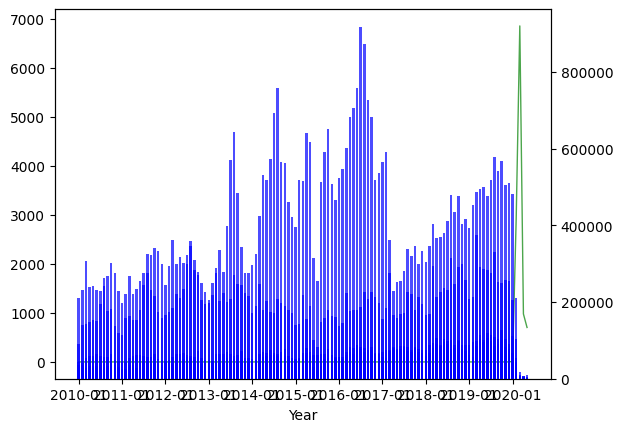

In [13]:
# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(combined_data['년월'], combined_data['신종감염병증후군'], color='green', linewidth=1, alpha=0.7)
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2.bar(combined_data['년월'], combined_data['계'], color='blue', label='Demand', alpha=0.7, width=0.7)

plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01", "2020-01"])
plt.show()

([<matplotlib.axis.XTick at 0x26518775f00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

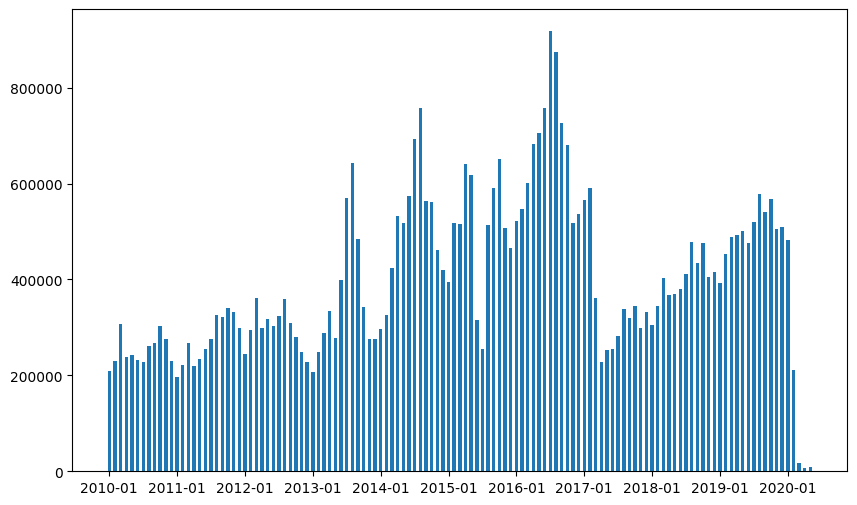

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.bar(combined_data['년월'], combined_data['계'], width=0.6)
plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01", "2020-01"])

([<matplotlib.axis.XTick at 0x2651d08a5c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

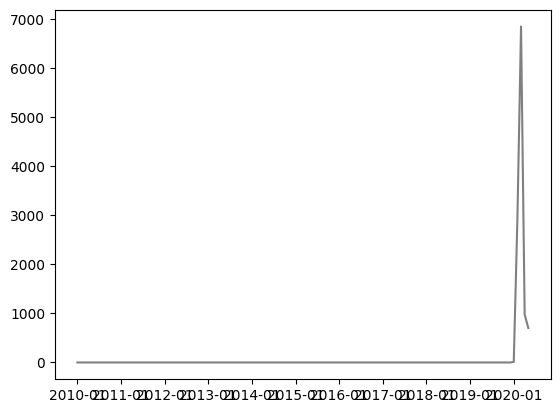

In [15]:
plt.plot(combined_data['년월'], combined_data['신종감염병증후군'], color='gray', linestyle='-') ## 선 그래프 출력
plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01", "2020-01"])